# Importing Packages

In [35]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy.stats

# Importing Data

In [46]:
data1 = pd.read_csv('data1.csv')
data2 = pd.read_csv('data2.csv')


x = data1['x'].to_numpy()
y1 = data1['y1'].to_numpy()
y2 = data1['y2'].to_numpy()
y3 = data1['y3'].to_numpy()

x4 = data2['x4'].to_numpy()
y4 = data2['y4'].to_numpy()

In [47]:
print(x)

[10  8 13  9 11 14  6  4 12  7  5]


Now plotting each data set and finding the var and variance for x and y:

In [48]:
xMean = np.mean(x)
y1Mean = np.mean(y1)
y2Mean = np.mean(y2)
y3Mean = np.mean(y3)

x4Mean = np.mean(x4)
y4Mean = np.mean(y4)

xVar = np.var(x)
y1Var = np.var(y1)
y2Var = np.var(y2)
y3Var = np.var(y3)

x4Var = np.var(x4)
y4Var = np.var(y4)

In [49]:
x_y1LinRegress = scipy.stats.linregress(x, y1)      # slope, intercept, corrcoeff, ...
x_y2LinRegress = scipy.stats.linregress(x, y2)      # slope, intercept, corrcoeff, ...
x_y3LinRegress = scipy.stats.linregress(x, y3)      # slope, intercept, corrcoeff, ...

x4_y4LinRegress = scipy.stats.linregress(x4, y4)      # slope, intercept, corrcoeff, ...

In [60]:
xPlot = np.linspace(np.min(x), np.max(x), 100)

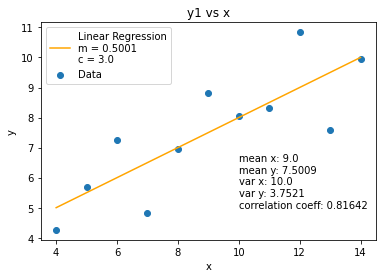

In [73]:
vals = f'mean x: {xMean:.5}\nmean y: {y1Mean:.5}\nvar x: {xVar:.5}\nvar y: {y1Var:.5}\ncorrelation coeff: {x_y1LinRegress[2]:.5}'

plt.figure()
plt.scatter(x, y1, label='Data')
plt.plot(xPlot, xPlot * x_y1LinRegress[0] + x_y1LinRegress[1], color='orange', label=f'Linear Regression\nm = {x_y1LinRegress[0]:.4}\nc = {x_y1LinRegress[1]:.4}')
plt.text(10, 5, vals)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('y1 vs x')
plt.show()

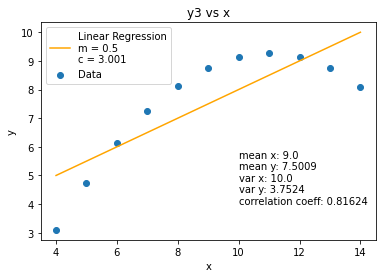

In [74]:
vals = f'mean x: {xMean:.5}\nmean y: {y2Mean:.5}\nvar x: {xVar:.5}\nvar y: {y2Var:.5}\ncorrelation coeff: {x_y2LinRegress[2]:.5}'

plt.figure()
plt.scatter(x, y2, label='Data')
plt.plot(xPlot, xPlot * x_y2LinRegress[0] + x_y2LinRegress[1], color='orange', label=f'Linear Regression\nm = {x_y2LinRegress[0]:.4}\nc = {x_y2LinRegress[1]:.4}')
plt.text(10, 4, vals)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('y3 vs x')
plt.show()

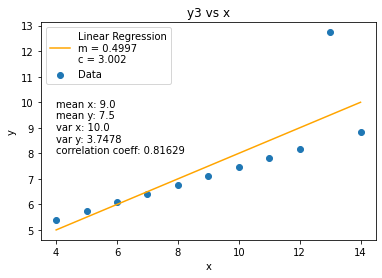

In [75]:
vals = f'mean x: {xMean:.5}\nmean y: {y3Mean:.5}\nvar x: {xVar:.5}\nvar y: {y3Var:.5}\ncorrelation coeff: {x_y3LinRegress[2]:.5}'

plt.figure()
plt.scatter(x, y3, label='Data')
plt.plot(xPlot, xPlot * x_y3LinRegress[0] + x_y3LinRegress[1], color='orange', label=f'Linear Regression\nm = {x_y3LinRegress[0]:.4}\nc = {x_y3LinRegress[1]:.4}')
plt.text(4, 8, vals)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('y3 vs x')
plt.show()

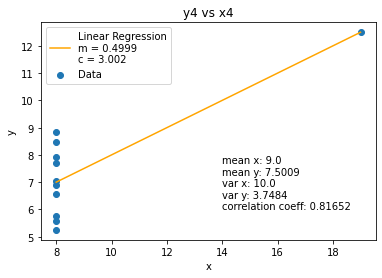

In [76]:
vals = f'mean x: {x4Mean:.5}\nmean y: {y4Mean:.5}\nvar x: {x4Var:.5}\nvar y: {y4Var:.5}\ncorrelation coeff: {x4_y4LinRegress[2]:.5}'

x4Plot = np.linspace(np.min(x4), np.max(x4), 100)

plt.figure()
plt.scatter(x4, y4, label='Data')
plt.plot(x4Plot, x4Plot * x4_y4LinRegress[0] + x4_y4LinRegress[1], color='orange', label=f'Linear Regression\nm = {x4_y4LinRegress[0]:.4}\nc = {x4_y4LinRegress[1]:.4}')
plt.text(14, 6, vals)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('y4 vs x4')
plt.show()